This notebook contains some examples of how to use the detectron model and run ocr through it.

In [1]:
import layoutparser as lp
import cv2
import pdf2image
import os
import easyocr
import pandas as pd
import time

import layoutparser_pipeline
from layoutparser_pipeline import PDF_PreProcessing, OCR, PDF_PostProcessing
import pipeline

In [2]:
pdf_file_path="../../../Downloads/Specimen Reinsurance Agreement_sample.pdf"
output_path="../../../Dokumente/Output/"

model_architecture='lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config'
extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8]
label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"}

pdf_preprocesser=PDF_PreProcessing(pdf_file_path=pdf_file_path,
                                  output_path=output_path,
                                  model_architecture=model_architecture,
                                  extra_config=extra_config,
                                  label_map=label_map)

In [5]:
pdf_preprocesser.run()

Image path: ../../../Dokumente/Output/page0.jpg


/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Image path: ../../../Dokumente/Output/page1.jpg
Image path: ../../../Dokumente/Output/page2.jpg


In [7]:
output_dict = pdf_preprocesser.images_outputs
output_df = pd.DataFrame(output_dict)
output_df.to_csv("./output_dict_raw.csv", sep=",")
output_df

,image_path,page,page_elem,x_1,x_2,y_1,y_2,text,id,type,parent,next,score
0,../../../Dokumente/Output/page0.jpg,0,0,598.185364,1054.429199,530.437378,563.928467,None,None,Title,None,None,0.903068
1,../../../Dokumente/Output/page0.jpg,0,1,522.442505,1137.690186,793.729431,828.500183,None,None,Title,None,None,0.878710
2,../../../Dokumente/Output/page0.jpg,0,2,555.465332,1103.136475,1326.348145,1356.107422,None,None,Text,None,None,0.826573
3,../../../Dokumente/Output/page1.jpg,1,0,681.760010,970.642395,127.986870,158.849625,None,None,Title,None,None,0.873829
4,../../../Dokumente/Output/page2.jpg,2,0,107.046318,1520.031250,573.467468,701.493469,None,None,Text,None,None,0.996852
5,../../../Dokumente/Output/page2.jpg,2,1,106.839241,1527.907104,276.475281,368.011780,None,None,Text,None,None,0.993246
6,../../../Dokumente/Output/page2.jpg,2,2,116.338432,227.124146,739.389160,767.909180,None,None,Title,None,None,0.989392
7,../../../Dokumente/Output/page2.jpg,2,3,107.218948,1463.040283,452.937714,546.674744,None,None,Text,None,None,0.988979
8,../../../Dokumente/Output/page2.jpg,2,4,116.504761,349.661652,185.185135,216.131500,None,None,Title,None,None,0.983909
9,../../../Dokumente/Output/page2.jpg,2,5,120.640854,1446.271606,985.455200,1048.372925,None,None,Text,None,None,0.943216


In [8]:
ocr_agent2 = OCR(input_dict=output_dict)

In [9]:
t0 = time.time()
ocr_agent2.run()
t1 = time.time()
print("Process took: {}s".format(t1-t0))

Process took: 24.447540521621704s


In [12]:
ocr_dict = ocr_agent2.get_Output()

In [16]:
ocr_df = pd.DataFrame(ocr_dict)
ocr_df.to_csv("./output_dict.csv")
ocr_df.head(5)

,image_path,page,page_elem,x_1,x_2,y_1,y_2,text,id,type,parent,next,score,content
0,../../../Dokumente/Output/page0.jpg,0,0,598.185364,1054.429199,530.437378,563.928467,None,None,Title,None,None,0.903068,THIS REINSURANCE AGREEMENT\n
1,../../../Dokumente/Output/page0.jpg,0,1,522.442505,1137.690186,793.729431,828.500183,None,None,Title,None,None,0.878710,JOHN HANCOCK LIFE INSURANCE COMPANY\n
2,../../../Dokumente/Output/page0.jpg,0,2,555.465332,1103.136475,1326.348145,1356.107422,None,None,Text,None,None,0.826573,This Agreement may be referred to as Agreement\n
3,../../../Dokumente/Output/page1.jpg,1,0,681.760010,970.642395,127.986870,158.849625,None,None,Title,None,None,0.873829,‘ABLE OF CONTENTS\n
4,../../../Dokumente/Output/page2.jpg,2,0,107.046318,1520.031250,573.467468,701.493469,None,None,Text,None,None,0.996852,This Agreement is applicable only to reinsuran...


In [2]:
df = pd.read_csv("./output_dict.csv", index_col=0)
df.head()

,image_path,page,page_elem,x_1,x_2,y_1,y_2,text,id,type,parent,next,score,content
0,../../../Dokumente/Output/page0.jpg,0,0,598.185364,1054.429199,530.437378,563.928467,NaN,NaN,Title,NaN,NaN,0.903068,THIS REINSURANCE AGREEMENT\n
1,../../../Dokumente/Output/page0.jpg,0,1,522.442505,1137.690186,793.729431,828.500183,NaN,NaN,Title,NaN,NaN,0.878710,JOHN HANCOCK LIFE INSURANCE COMPANY\n
2,../../../Dokumente/Output/page0.jpg,0,2,555.465332,1103.136475,1326.348145,1356.107422,NaN,NaN,Text,NaN,NaN,0.826573,This Agreement may be referred to as Agreement\n
3,../../../Dokumente/Output/page1.jpg,1,0,681.760010,970.642395,127.986870,158.849625,NaN,NaN,Title,NaN,NaN,0.873829,‘ABLE OF CONTENTS\n
4,../../../Dokumente/Output/page2.jpg,2,0,107.046318,1520.031250,573.467468,701.493469,NaN,NaN,Text,NaN,NaN,0.996852,This Agreement is applicable only to reinsuran...


In [5]:
pipeline.question_answering(df, column="content")

Widget Javascript not detected.  It may not be installed or enabled properly. Reconnecting the current kernel may help.


AttributeError: 'FloatProgress' object has no attribute 'style'

In [15]:
final_dict = ocr_agent2.get_Output()

In [24]:
content_df = pd.DataFrame(final_dict["content"], columns=["content"])

,content
0,THIS REINSURANCE AGREEMENT\n
1,JOHN HANCOCK LIFE INSURANCE COMPANY\n
2,This Agreement may be referred to as Agreement\n
3,‘ABLE OF CONTENTS\n
4,This Agreement is applicable only to reinsuran...
5,The Company will cede to the Reinsurer a porti...
6,Currency\n
7,The Company will also cede to the Reinsurer a ...
8,Business Reinsured\n
9,The Company’s current Underwriting Forms and E...


In [22]:
len(final_dict["content"])

15

In [25]:
pd.DataFrame(final_dict, )

ValueError: Mixing dicts with non-Series may lead to ambiguous ordering.

In [5]:
for i, block in enumerate(output_dict["block"]):
    print("page: {}, x_1: {}".format(output_dict["page"][i], output_dict["x_1"][i]))
    print("Image path: {}".format(output_dict["image_path"][0]))
    print("block: {}".format(block))
    if i == 5:
        break

page: 0, x_1: 600.2437744140625
Image path: ../../../Dokumente/Output/page0.jpg
block: 0
page: 0, x_1: 523.46142578125
Image path: ../../../Dokumente/Output/page0.jpg
block: 1
page: 1, x_1: 683.92822265625
Image path: ../../../Dokumente/Output/page0.jpg
block: 2
page: 2, x_1: 106.3824462890625
Image path: ../../../Dokumente/Output/page0.jpg
block: 3
page: 2, x_1: 106.8777084350586
Image path: ../../../Dokumente/Output/page0.jpg
block: 4
page: 2, x_1: 116.4141616821289
Image path: ../../../Dokumente/Output/page0.jpg
block: 5


In [5]:
pdf_preprocesser.images_outputs

{'../../../Dokumente/Output/page0.jpg': {'../../../Dokumente/Output/page0.jpg_0': {'type': 'Title',
   'x_1': 600.2437744140625,
   'x_2': 1052.5257568359375,
   'y_1': 529.693603515625,
   'y_2': 563.4124145507812,
   'id': None},
  '../../../Dokumente/Output/page0.jpg_1': {'type': 'Title',
   'x_1': 523.46142578125,
   'x_2': 1134.8458251953125,
   'y_1': 791.8853759765625,
   'y_2': 828.7390747070312,
   'id': None}},
 '../../../Dokumente/Output/page9.jpg': {'../../../Dokumente/Output/page9.jpg_0': {'type': 'Text',
   'x_1': 118.20857238769531,
   'x_2': 1511.57275390625,
   'y_1': 696.160400390625,
   'y_2': 925.5632934570312,
   'id': None},
  '../../../Dokumente/Output/page9.jpg_1': {'type': 'Title',
   'x_1': 115.65070343017578,
   'x_2': 246.53700256347656,
   'y_1': 184.92979431152344,
   'y_2': 215.85279846191406,
   'id': None},
  '../../../Dokumente/Output/page9.jpg_2': {'type': 'Title',
   'x_1': 115.52725219726562,
   'x_2': 295.6769714355469,
   'y_1': 959.5592651367188,

In [9]:
files_dir = os.listdir(output_path)
files_dir.sort()
import re
def natural_key(string_):
    """See https://blog.codinghorror.com/sorting-for-humans-natural-sort-order/"""
    return [int(s) if s.isdigit() else s for s in re.split(r'(\d+)', string_)]

sorted(files_dir, key=natural_key)
files_dir

['0.jpg',
 '1.jpg',
 '10.jpg',
 '11.jpg',
 '12.jpg',
 '13.jpg',
 '14.jpg',
 '15.jpg',
 '16.jpg',
 '17.jpg',
 '18.jpg',
 '19.jpg',
 '2.jpg',
 '20.jpg',
 '21.jpg',
 '22.jpg',
 '23.jpg',
 '3.jpg',
 '4.jpg',
 '5.jpg',
 '6.jpg',
 '7.jpg',
 '8.jpg',
 '9.jpg',
 'logfile.txt']

In [11]:
pdf_preprocesser.load_detectron()

In [17]:
model = pdf_preprocesser.model

In [18]:
image = cv2.imread("../../../Dokumente/Output/page2.jpg")
#image = image[..., ::-1]

In [19]:
layout = model.detect(image)

In [20]:
for i, l in enumerate(layout):
    print("Layout {}: {}".format(i, l))

Layout 0: TextBlock(block=Rectangle(x_1=106.38250732421875, y_1=573.497802734375, x_2=1519.94921875, y_2=699.8588256835938), text=None, id=None, type=Text, parent=None, next=None, score=0.9970073103904724)
Layout 1: TextBlock(block=Rectangle(x_1=106.8778305053711, y_1=275.8592834472656, x_2=1549.193603515625, y_2=368.1645202636719), text=None, id=None, type=Text, parent=None, next=None, score=0.9927406907081604)
Layout 2: TextBlock(block=Rectangle(x_1=116.4141845703125, y_1=184.08172607421875, x_2=347.2743835449219, y_2=214.769775390625), text=None, id=None, type=Title, parent=None, next=None, score=0.9888573288917542)
Layout 3: TextBlock(block=Rectangle(x_1=116.20697021484375, y_1=739.6810302734375, x_2=227.66290283203125, y_2=767.7313842773438), text=None, id=None, type=Title, parent=None, next=None, score=0.9877767562866211)
Layout 4: TextBlock(block=Rectangle(x_1=104.80663299560547, y_1=453.4064636230469, x_2=1459.447021484375, y_2=547.0497436523438), text=None, id=None, type=Text,

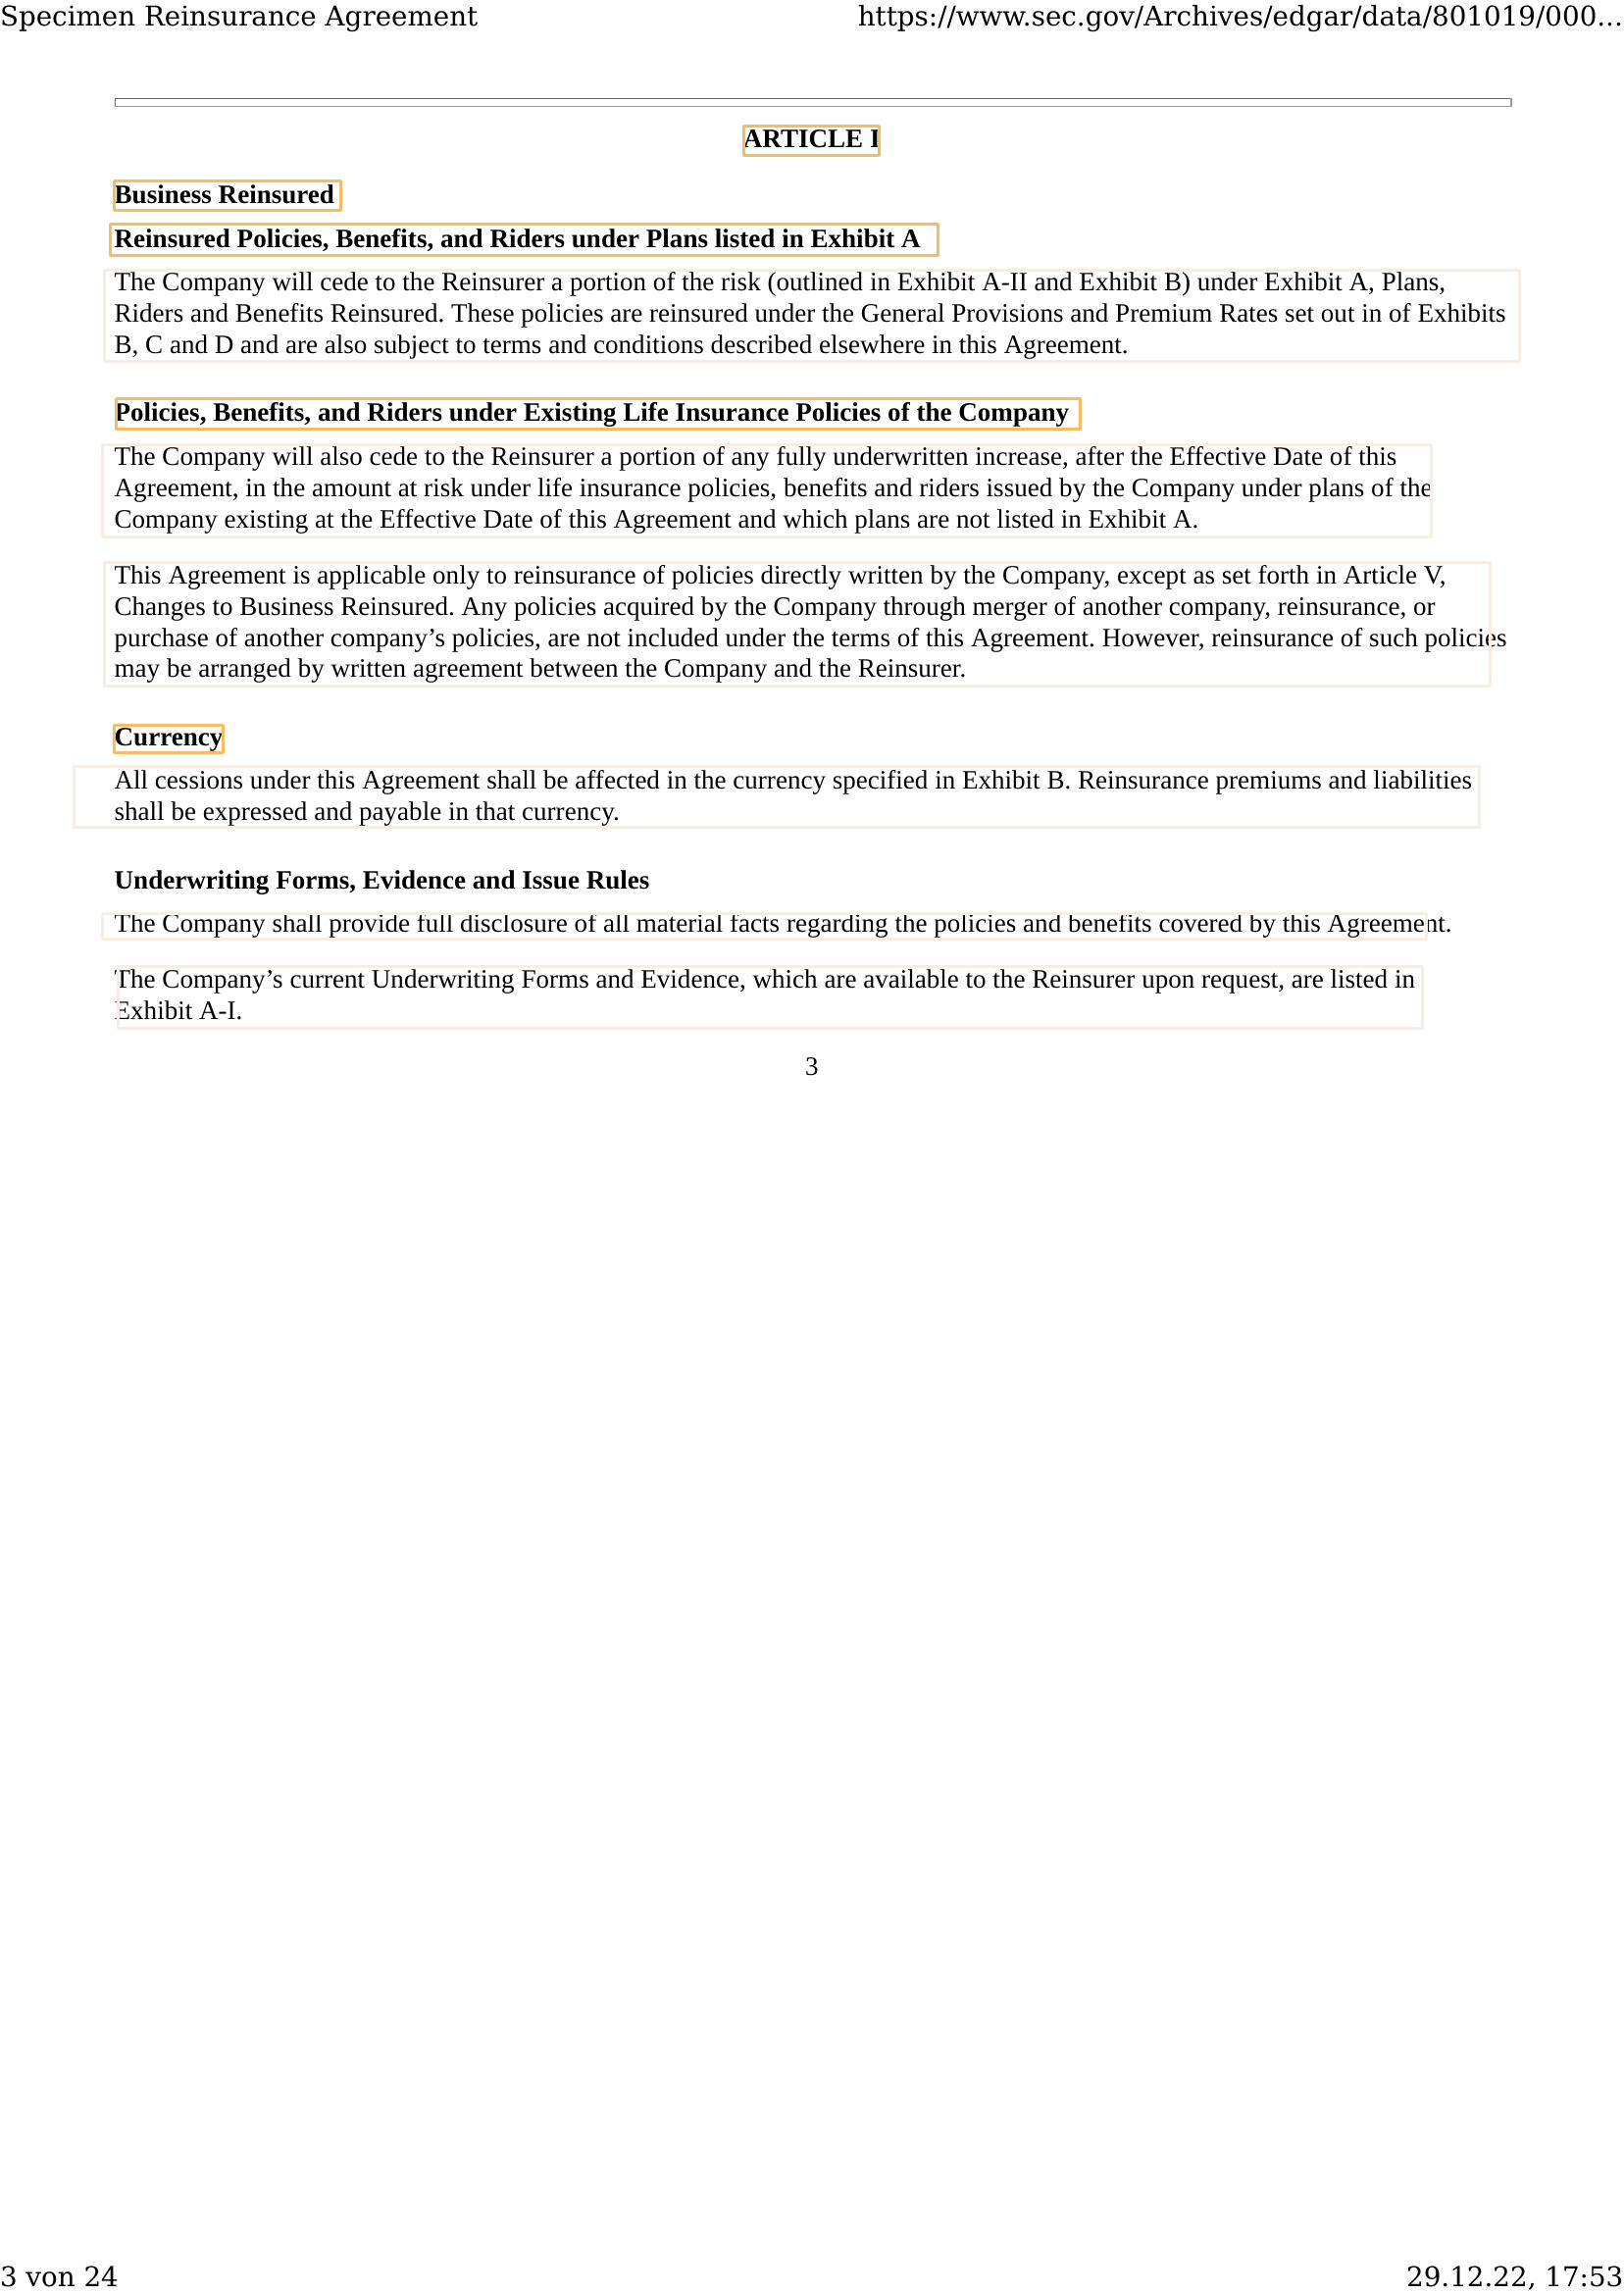

In [21]:
lp.draw_box(image, layout=layout, box_width=3)

In [22]:
print("x_1: {}".format(layout[0].type))
layout[0]

x_1: Text


TextBlock(block=Rectangle(x_1=106.38250732421875, y_1=573.497802734375, x_2=1519.94921875, y_2=699.8588256835938), text=None, id=None, type=Text, parent=None, next=None, score=0.9970073103904724)

In [23]:
text_blocks = lp.Layout([b for b in layout if b.type == "Text"])
figure_blocks = lp.Layout([b for b in layout if b.type == "Figure"])

In [24]:
layout

Layout(_blocks=[TextBlock(block=Rectangle(x_1=106.38250732421875, y_1=573.497802734375, x_2=1519.94921875, y_2=699.8588256835938), text=None, id=None, type=Text, parent=None, next=None, score=0.9970073103904724), TextBlock(block=Rectangle(x_1=106.8778305053711, y_1=275.8592834472656, x_2=1549.193603515625, y_2=368.1645202636719), text=None, id=None, type=Text, parent=None, next=None, score=0.9927406907081604), TextBlock(block=Rectangle(x_1=116.4141845703125, y_1=184.08172607421875, x_2=347.2743835449219, y_2=214.769775390625), text=None, id=None, type=Title, parent=None, next=None, score=0.9888573288917542), TextBlock(block=Rectangle(x_1=116.20697021484375, y_1=739.6810302734375, x_2=227.66290283203125, y_2=767.7313842773438), text=None, id=None, type=Title, parent=None, next=None, score=0.9877767562866211), TextBlock(block=Rectangle(x_1=104.80663299560547, y_1=453.4064636230469, x_2=1459.447021484375, y_2=547.0497436523438), text=None, id=None, type=Text, parent=None, next=None, score

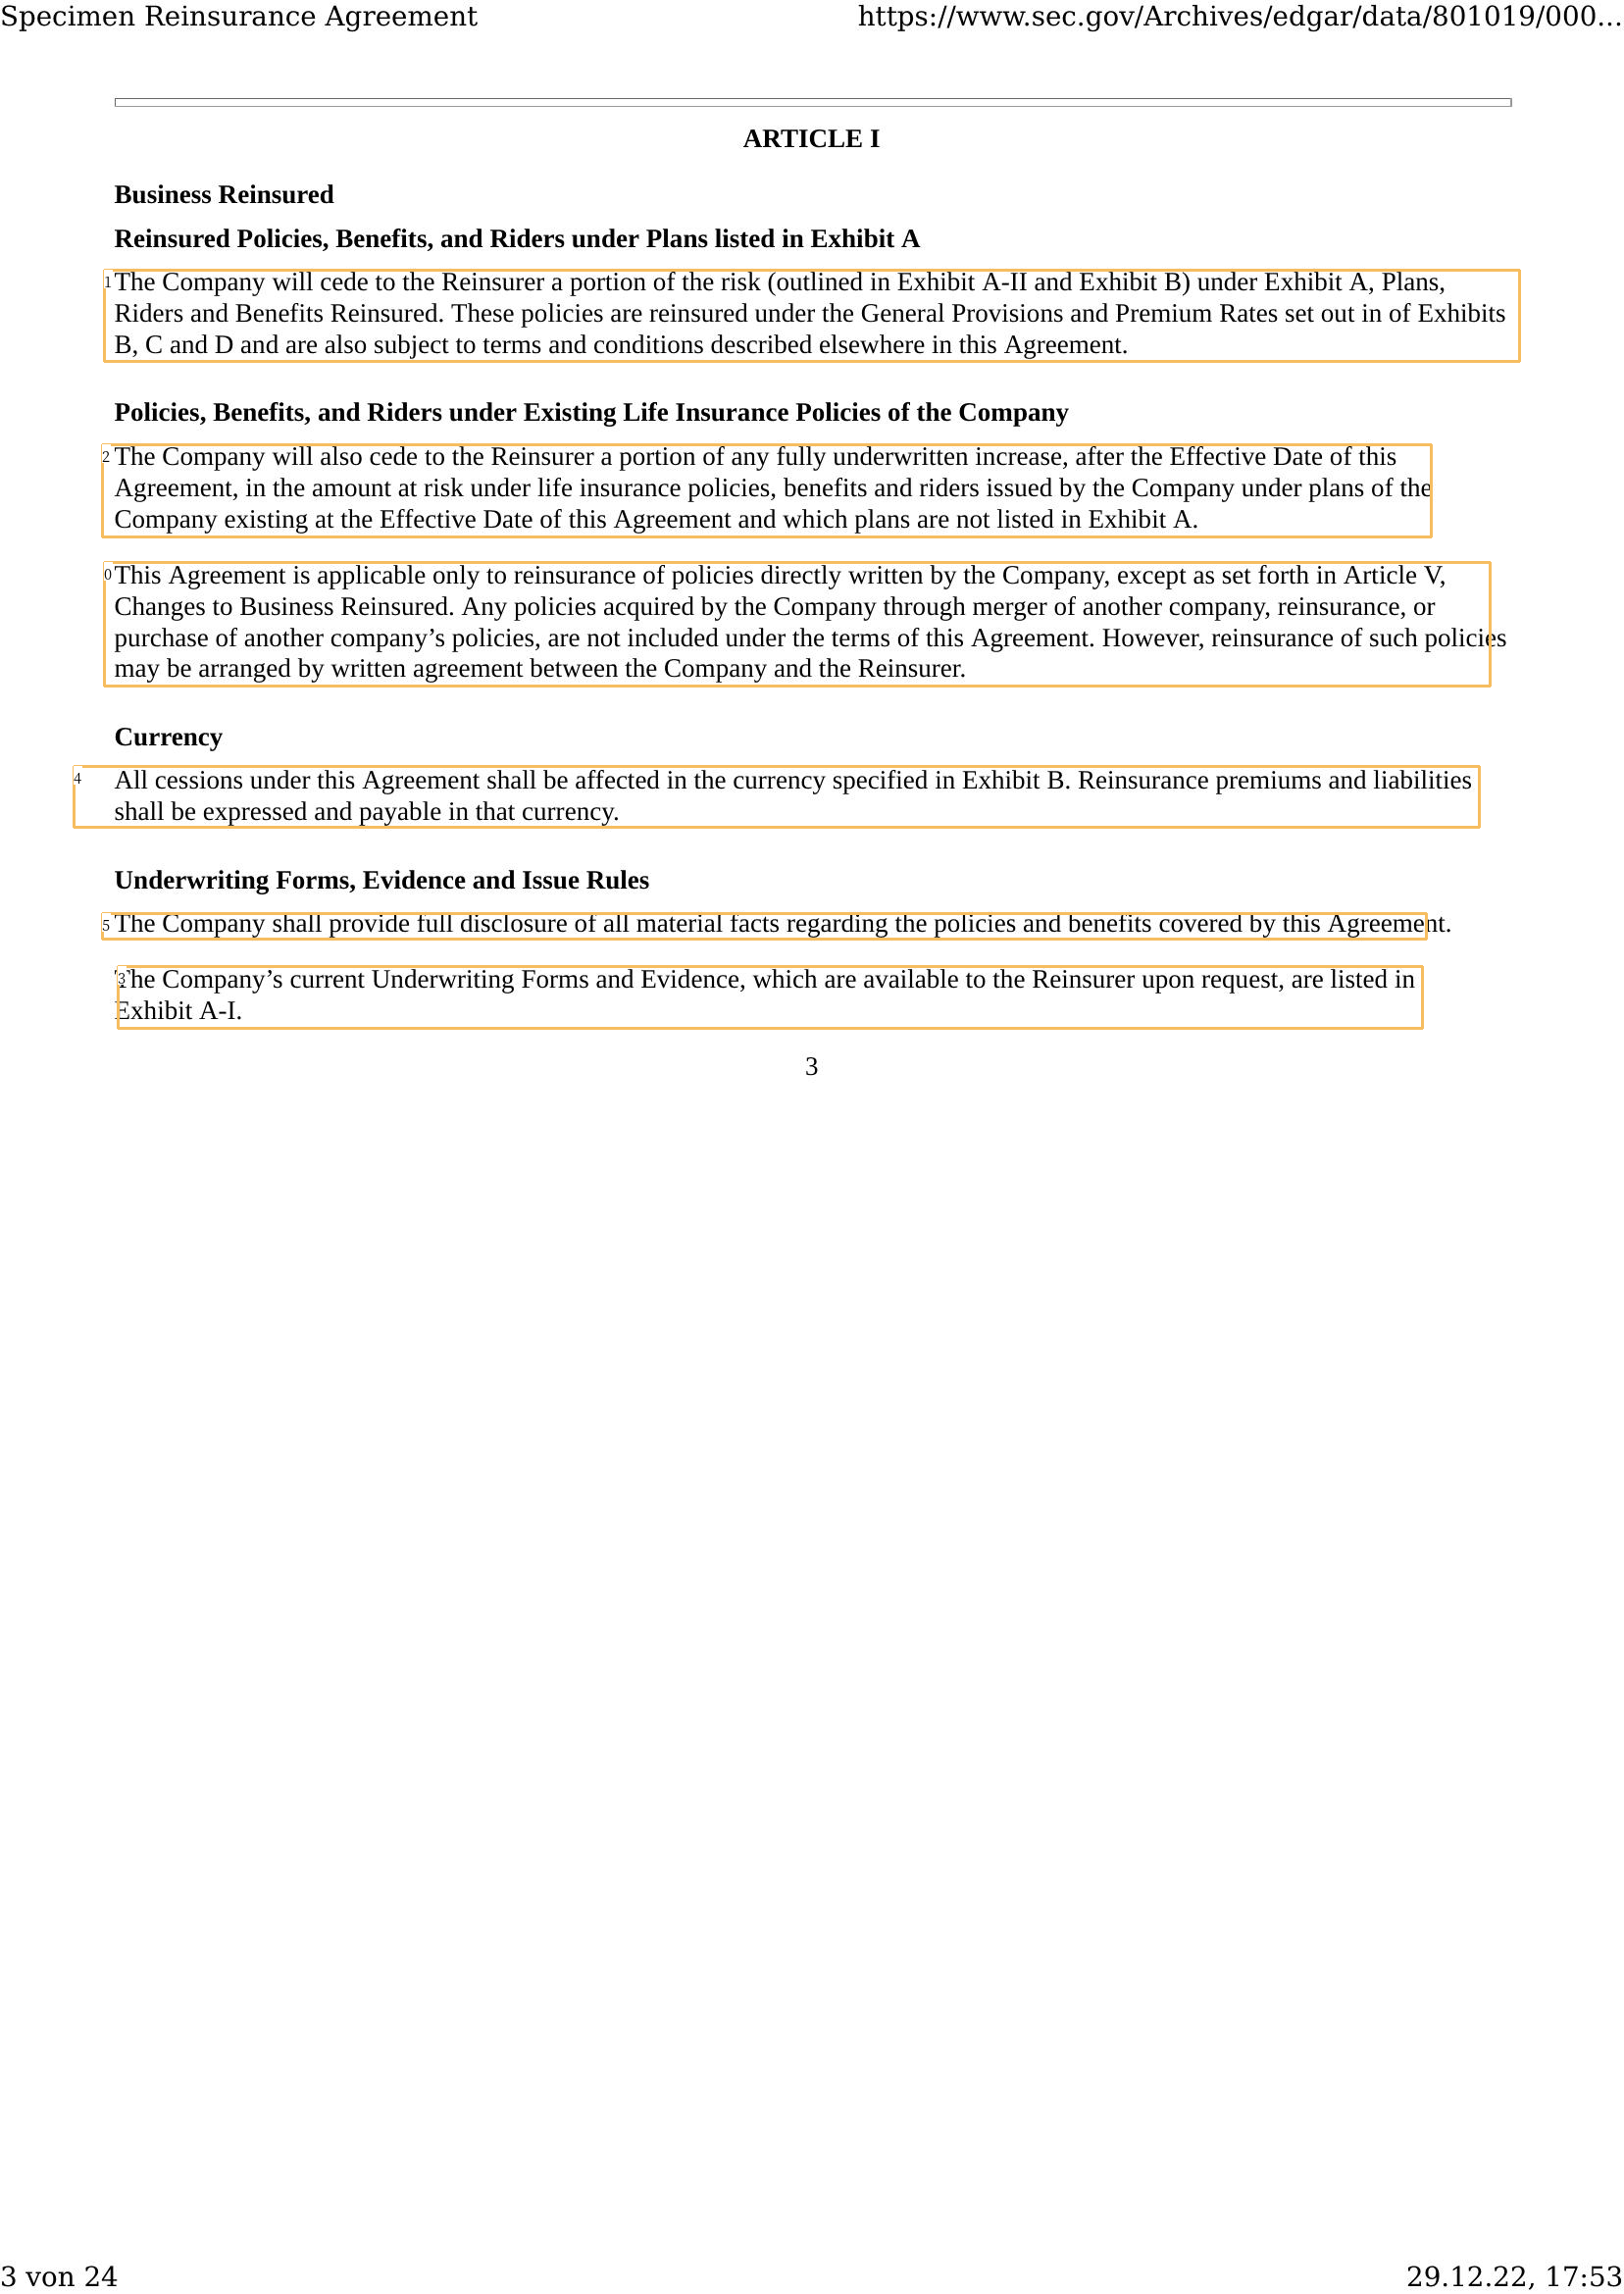

In [25]:
lp.draw_box(image, text_blocks,
           box_width=3,
           show_element_id=True)

In [26]:
ocr_agent = lp.TesseractAgent(languages="eng")

In [27]:
for block in text_blocks:
    segment_image = (block.pad(left=5, right=5, top=5, bottom=5).crop_image(image))
    
    text = ocr_agent.detect(segment_image)
    print(text)
    block.set(text=text, inplace=True)

This Agreement is applicable only to reinsurance of policies directly written by the Company, except as set forth in Article V,
Changes to Business Reinsured. Any policies acquired by the Company through merger of another company, reinsurance, or
purchase of another company’s policies, are not included under the terms of this Agreement. However, reinsurance of such policie
may be arranged by written agreement between the Company and the Reinsurer.

The Company will cede to the Reinsurer a portion of the risk (outlined in Exhibit A-II and Exhibit B) under Exhibit A, Plans,
Riders and Benefits Reinsured. These policies are reinsured under the General Provisions and Premium Rates set out in of Exhibits
B, C and D and are also subject to terms and conditions described elsewhere in this Agreement.

The Company will also cede to the Reinsurer a portion of any fully underwritten increase, after the Effective Date of this
Agreement, in the amount at risk under life insurance policies, benefits

KeyboardInterrupt: 

In [15]:
for txt in text_blocks.get_texts():
    print(txt, end="\n---\n")

NameError: name 'text_blocks' is not defined

In [16]:
for block in text_blocks:
    print(block, "\n\n")
    print(block.pad(left=5, right=5, top=5, bottom=5))
    break

NameError: name 'text_blocks' is not defined